<h1>Extracting Stock Data Using a Python Library</h1>


In [28]:
!pip install yfinance==0.2.4
#!pip install pandas==1.3.3

In [67]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

## Using the yfinance Library to Extract Stock Data


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock of interest. Below, I am going to look at Coca Cola `KO`


In [55]:
cocacola = yf.Ticker("KO")

In [56]:
cocacola_data = cocacola.history(period = "max")

I am going to reset the index for this dataframe and use inplace = true to make the changes directly to the dataframe.

In [57]:
cocacola_data.reset_index(inplace=True)
cocacola_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02 00:00:00-05:00,0.048913,0.050245,0.048913,0.048913,806400,0.0,0.0
1,1962-01-03 00:00:00-05:00,0.048187,0.048187,0.047097,0.047823,1574400,0.0,0.0
2,1962-01-04 00:00:00-05:00,0.047945,0.048550,0.047945,0.048187,844800,0.0,0.0
3,1962-01-05 00:00:00-05:00,0.048187,0.048792,0.046976,0.047097,1420800,0.0,0.0
4,1962-01-08 00:00:00-05:00,0.046734,0.046734,0.045705,0.046613,2035200,0.0,0.0


### Extracting Stock Price


Next I'll plot the `Open` price against the `Date`:


<AxesSubplot:title={'center':'Coca Cola Stock Price Over Time'}, xlabel='Date'>

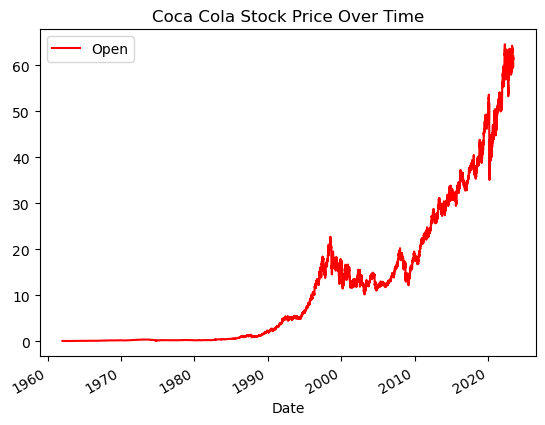

In [63]:
cocacola_data.plot(x="Date", y="Open", title = 'Coca Cola Stock Price Over Time', color = 'red')

The Coca Cola stock price trends upwwards fairly consistently over time, with one noticeable dip around 2000-2010. This seems to reflect general positive financial performance and positive market sentiment for the company over time.

### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data.


In [59]:
cocacola.dividends

Date
1962-03-13 00:00:00-05:00    0.001563
1962-06-11 00:00:00-04:00    0.001563
1962-09-11 00:00:00-04:00    0.001563
1962-11-28 00:00:00-05:00    0.001563
1963-03-11 00:00:00-05:00    0.001758
                               ...   
2022-06-14 00:00:00-04:00    0.440000
2022-09-15 00:00:00-04:00    0.440000
2022-11-30 00:00:00-05:00    0.440000
2023-03-16 00:00:00-04:00    0.460000
2023-06-15 00:00:00-04:00    0.460000
Name: Dividends, Length: 245, dtype: float64

We can plot the dividends overtime:


<AxesSubplot:title={'center':'Coca Cola Dividends Over Time'}, xlabel='Date'>

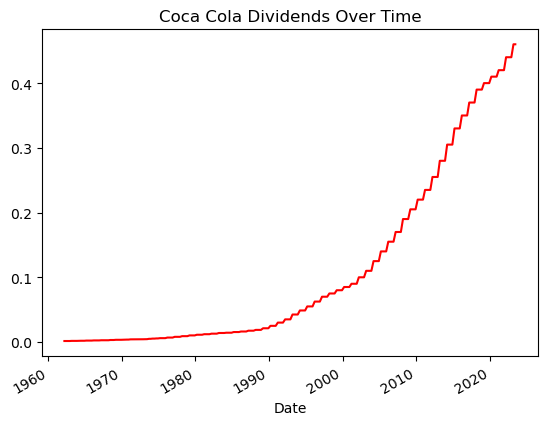

In [64]:
cocacola.dividends.plot(title = 'Coca Cola Dividends Over Time', color = 'red')

We see increasing dividends over time for Cocacola, which signifies the company is generating consistent and growing profits and reflects their financial health and stability. It has sufficient earnings to continue to distribute to shareholders as dividends. 

### View Trading Activity Patterns


Trading activity patterns can provide valuable insights to investors regarding market dynamics, investor sentiment, and potential investment opportunities. These patterns can reveal things like Liquidity and market depth, price trends, support and resistance levels, and market sentiment. 


In [76]:
cocacola_history = cocacola.history(period = "max")

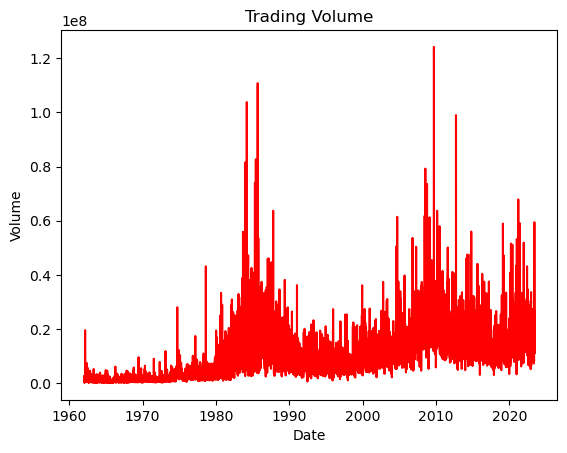

In [79]:
plt.plot(cocacola_history['Volume'], color='red')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume')
plt.show()

<h1>Extracting Stock Data Using Webscraping</h1>


### View Revenue Patterns


Another way to extract stock data is through webscraping, which involves programmatically accessing and parsing the website's HTML or other structured data formats. Below is an example where I use webscraping to gather data on Tesla.


In [90]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = pd.read_html(str(url))
#parse html data using BeautifulSoup
tesla_revenue = html_data[0]

In [92]:
print(tesla_revenue)

    Tesla Annual Revenue(Millions of US $)  \
0                                     2021   
1                                     2020   
2                                     2019   
3                                     2018   
4                                     2017   
5                                     2016   
6                                     2015   
7                                     2014   
8                                     2013   
9                                     2012   
10                                    2011   
11                                    2010   
12                                    2009   

   Tesla Annual Revenue(Millions of US $).1  
0                                   $53,823  
1                                   $31,536  
2                                   $24,578  
3                                   $21,461  
4                                   $11,759  
5                                    $7,000  
6                                

In [93]:
# Clean the Revenue column
tesla_revenue.rename(columns={"Tesla Annual Revenue(Millions of US $)": "Date",
                               "Tesla Annual Revenue(Millions of US $).1": "Revenue"}, inplace=True)
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', '', regex=True)
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', '', regex=True)
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')


In [94]:
# Drop rows with missing or non-numeric values
tesla_revenue.dropna(subset=['Revenue'], inplace=True)


In [95]:
tesla_revenue


,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759
5,2016,7000
6,2015,4046
7,2014,3198
8,2013,2013
9,2012,413


<AxesSubplot:title={'center':'Tesla Revenue Over Time'}, xlabel='Date'>

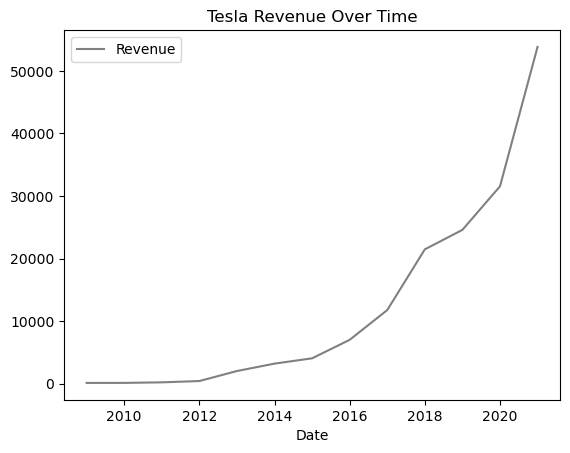

In [96]:
tesla_revenue.plot(x="Date", y="Revenue", title = 'Tesla Revenue Over Time', color = 'Grey')


Above we can see the trends for Tesla revenue over time since 2009. We see positive growth for the company in the last 14 years, with steady but slow growth between 2009 and 2014 and a more impressive upward movement from 2016 onward. 

### View Shares Outstanding Patterns


Shares outstanding refers to the total number of shares of a company's stock that are held by shareholders, including both institutional and individual investors. It represents the ownership stake in the company that is distributed among the shareholders.

The number of shares outstanding determines the ownership percentage of each shareholder and voting rights of shareholders It also is used along with current market price of the company stock to calculate market capitalization, and earnings per share.

In [100]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/shares-outstanding"

response = requests.get(url)
html_tables = pd.read_html(html_content)
tesla_shares = html_tables[0]



In [101]:
print(tesla_shares)

    Tesla Annual Shares Outstanding(Millions of Shares)  \
0                                                2022     
1                                                2021     
2                                                2020     
3                                                2019     
4                                                2018     
5                                                2017     
6                                                2016     
7                                                2015     
8                                                2014     
9                                                2013     
10                                               2012     
11                                               2011     
12                                               2010     
13                                               2009     

    Tesla Annual Shares Outstanding(Millions of Shares).1  
0                                                3475 

In [104]:
# Clean the columns
tesla_shares.rename(columns={"Tesla Annual Shares Outstanding(Millions of Shares)": "Date",
                               "Tesla Annual Shares Outstanding(Millions of Shares).1": "Shares"}, inplace=True)

In [105]:
tesla_shares.dropna(subset=['Shares'], inplace=True)

In [106]:
tesla_shares

,Date,Shares
0,2022,3475
1,2021,3386
2,2020,3249
3,2019,2661
4,2018,2559
5,2017,2490
6,2016,2163
7,2015,1923
8,2014,1868
9,2013,1791


<AxesSubplot:title={'center':'Tesla Shares Outstanding (Millions)'}, xlabel='Date'>

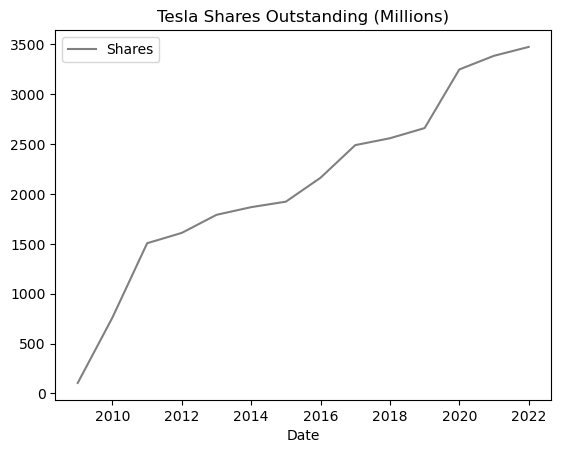

In [110]:
tesla_shares.plot(x="Date", y="Shares", title = 'Tesla Shares Outstanding (Millions)', color = 'Grey')
